In [2]:
# pip install spacy

  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
  Attempting uninstall: colorama
    Found existing installation: colorama 0.4.4
    Uninstalling colorama-0.4.4:
      Successfully uninstalled colorama-0.4.4
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\thai thanh\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
# !python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


You should consider upgrading via the 'C:\Users\Thai Thanh\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
# pip install networkx

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\thai thanh\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [5]:
# pip install pyvis

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\thai thanh\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [75]:
# pip install python-louvain

Using legacy 'setup.py install' for python-louvain, since package 'wheel' is not installed.
    Running setup.py install for python-louvain: started
    Running setup.py install for python-louvain: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\thai thanh\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
import spacy #text processing, name recognition
from spacy import displacy
import networkx as nx #analyse network

import matplotlib.pyplot as plt

In [2]:
# Load spacy English languague model
NER = spacy.load("en_core_web_sm")

There are several methods for extracting relationship from text from simple rule-based methods to advanced deep learning model. However, the deep learning models are currently often trained on a specific data set, e.g: reseach papers on drug discovery. So they are not suitable for fantasy novel. So here, we use simple baseline model that is based on **Named entity recognition** with custome rule:

1. Tokenize every book into a list of sentences
2. Label each sentence by the name of the characters appearing in the sentence
3. Define a window size of how far 2 sentences are apart from each other and assume that if 2 characters are mentioned in 2 sentences within this window then there is a relationship between them.

## Load books

In [3]:
import os
 
# Get all book files in the data directory
all_books = [b for b in os.scandir('data') if '.txt' in b.name]

In [4]:
all_books

[<DirEntry '1 The Last Wish.txt'>,
 <DirEntry '2 The Sword of Destiny.txt'>,
 <DirEntry '3 Blood of Elves.txt'>,
 <DirEntry '4 Times of Contempt.txt'>,
 <DirEntry '5 Baptism of Fire.txt'>,
 <DirEntry '6 The Tower of the Swallow.txt'>,
 <DirEntry '7 The Lady of the Lake.txt'>,
 <DirEntry '8 something ends something begins.txt'>]

In [5]:
# pick the second book
book = all_books[1]
with open(book) as f:
    book_text = f.read()
book_doc = NER(book_text)

In [6]:
# Visualize identified entities
# do this for first 2000 characters
displacy.render(book_doc[0:2000], style="ent", jupyter=True)

## Load character names

In [7]:
# Read characters
character_df = pd.read_csv("characters.csv")

In [8]:
# Remove brackets and text within brackets
import re 
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x)) 
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0])

In [9]:
pd.set_option('display.max_rows', None)
character_df

book  \
0                   Category:Baptism of Fire characters   
1                   Category:Baptism of Fire characters   
2                   Category:Baptism of Fire characters   
3                   Category:Baptism of Fire characters   
4                   Category:Baptism of Fire characters   
5                   Category:Baptism of Fire characters   
6                   Category:Baptism of Fire characters   
7                   Category:Baptism of Fire characters   
8                   Category:Baptism of Fire characters   
9                   Category:Baptism of Fire characters   
10                  Category:Baptism of Fire characters   
11                  Category:Baptism of Fire characters   
12                  Category:Baptism of Fire characters   
13                  Category:Baptism of Fire characters   
14                  Category:Baptism of Fire characters   
15                  Category:Baptism of Fire characters   
16                  Category:Baptism of Fire characters   
17                  Category:Baptism of Fire characters   
18                  Category:Baptism of Fire characters   
19                  Category:Baptism of Fire characters   
20                  Category:Baptism of Fire characters   
21                  Category:Baptism of Fire characters   
22                  Category:Baptism of Fire characters   
23                  Category:Baptism of Fire characters   
24                  Category:Baptism of Fire characters   
25                  Category:Baptism of Fire characters   
26                  Category:Baptism of Fire characters   
27                  Category:Baptism of Fire characters   
28                  Category:Baptism of Fire characters   
29                  Category:Baptism of Fire characters   
30                  Category:Baptism of Fire characters   
31                  Category:Baptism of Fire characters   
32                  Category:Baptism of Fire characters   
33                  Category:Baptism of Fire characters   
34                  Category:Baptism of Fire characters   
35                  Category:Baptism of Fire characters   
36                  Category:Baptism of Fire characters   
37                  Category:Baptism of Fire characters   
38                  Category:Baptism of Fire characters   
39                  Category:Baptism of Fire characters   
40                  Category:Baptism of Fire characters   
41                  Category:Baptism of Fire characters   
42                  Category:Baptism of Fire characters   
43                  Category:Baptism of Fire characters   
44                  Category:Baptism of Fire characters   
45                  Category:Baptism of Fire characters   
46                  Category:Baptism of Fire characters   
47                  Category:Baptism of Fire characters   
48                  Category:Baptism of Fire characters   
49                  Category:Baptism of Fire characters   
50                  Category:Baptism of Fire characters   
51                  Category:Baptism of Fire characters   
52                  Category:Baptism of Fire characters   
53                  Category:Baptism of Fire characters   
54                  Category:Baptism of Fire characters   
55                  Category:Baptism of Fire characters   
56                  Category:Baptism of Fire characters   
57                  Category:Baptism of Fire characters   
58                  Category:Baptism of Fire characters   
59                  Category:Baptism of Fire characters   
60                  Category:Baptism of Fire characters   
61                  Category:Baptism of Fire characters   
62                  Category:Baptism of Fire characters   
63                  Category:Baptism of Fire characters   
64                  Category:Baptism of Fire characters   
65                  Category:Baptism of Fire characters   
66                  Category:Baptism of Fire characters   
67                  Category:Baptism of

## Get named entity list per sentence

In [10]:
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [11]:
sent_entity_df

sentence  \
0      (ï»¿The, Limits, of, the, Possible, \n, I, \n,...   
1      (", It, 's, been, an, hour, and, a, quarter, s...   
2                                 (He, 's, done, for, .)   
3      (", \n, The, townsfolk, ,, huddled, together, ...   
4      (A, fat, man, dressed, in, a, yellow, smock, \...   
5      (", We, have, to, wait, a, bit, longer, ,, ", ...   
6      (", Why, wait, ?, ", snorted, pimply, ,, ", Th...   
7      (Anyone, goes, down, there, ,, that, 's, the, ...   
8      (Have, you, forgotten, how, many, \n, have, di...   
9      (What, are, we, waiting, for, ?, ", \n, ", Thi...   
10         (murmured, the, fat, man, uncertainly, ., \n)   
11     (", An, agreement, you, made, with, a, living,...   
12     (", He, is, now, dead, ,, as, surely, as, the,...   
13     (It, was, plain, from, the, beginning, that, h...   
14     (He, did, n't, even, take, a, mirror, with, hi...   
15     (", \n, ", At, least, we, 've, saved, some, co...   
16                   (You, might, as, well, go, home, .)   
17     (As, far, as, the, sorcerer, 's, horse, and, b...   
18     (well, it, \n, would, be, a, shame, if, they, ...   
19     (", \n, ", Yes, ,, ", said, the, butcher, ,, "...   
20                           (Let, 's, take, a, look, .)   
21     (", \n, ", What, are, you, doing, ?, ", \n, ",...   
22     (Do, n't, get, in, the, way, unless, you, want...   
23     (", A, fine, old, mare, ,, ", repeated, the, b...   
24      (", Leave, the, horse, alone, ,, my, darling, .)   
25     (", \n, The, butcher, slowly, turned, around, ...   
26     (The, stranger, had, thick, curly, brown, hair...   
27                         (He, had, no, weapons, ., \n)   
28     (3, \n, ", Step, away, from, the, horse, ,, ",...   
29                          (", What, have, we, here, ?)   
30     (A, horse, and, saddlebags, belonging, to, ano...   
31     (Is, that, honourable, ?, ", \n, Pimply, slowl...   
32     (The, butcher, gave, a, nod, and, signalled, t...   
33     (Both, carried, heavy, clubs, ,, like, those, ...   
34     (", Who, are, you, ?, ", demanded, the, pimply...   
35                (", \n, ", You, carry, no, weapons, .)   
36     (", \n, ", That, 's, true, ,, ", the, stranger...   
37     (", \n, ", That, 's, no, good, ,, ", pimply, d...   
38     (", \n, The, butcher, also, drew, a, blade, ;,...   
39     (The, other, two, men, approached, ,, brandish...   
40     (", I, do, n't, carry, weapons, ,, ", responde...   
41     (", \n, From, behind, the, ruins, ,, two, youn...   
42     (The, crowd, quickly, parted, ,, retreated, th...   
43     (The, girls, smiled, ,, flashing, their, teeth...   
44     (They, had, blue, stripes, tattooed, from, the...   
45     (Lynx, pelt, clad, their, strong, muscles, fro...   
46     (From, behind, the, mail, -, clad, shoulder, o...   
47     (Pimply, got, down, on, one, knee, and, slowly...   
48     (From, the, hole, in, ruins, came, a, rumble, ...   
49     (Following, the, hands, ,, a, white, head, app...   
50               (A, murmur, escaped, the, crowd, ., \n)   
51     (The, alabaster, -, haired, man, straightened,...   
52     (Holding, the, beast, by, its, long, lizard, -...   
53     (The, burgrave, jumped, backwards, and, trippe...   
54     (Its, slashed, throat, ,, once, carmine, ,, wa...   
55              (Its, sunken, eyes, were, glassy, ., \n)   
56     (", Here, 's, the, basilisk, ,, ", said, the, ...   
57     (I, will, check, them, ,, I, 'm, warning, you, .)   
58     (", \n, 4, \n, With, shaking, hands, ,, the, b...   
59     (The, white, -, haired, man, looked, around, a...   
60     (He, also, noticed, the, man, in, the, brown, ...   
61     (", It, 's, always, the, same, ,, ", he, said,...   
62     (You, people, never, change, ,, damn, you, to,...   
63     (", \n, ", We, have, n't, touched, your, bags,...   
64     (The, men, armed, with, the, clubs, had, long,...   
65     (", Your, things, have, not, been, disturbed, ...   
66     (At, the, sight, of, 

In [12]:
# Function to filter out non-character entities
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list 
            if ent in list(character_df.character) 
            or ent in list(character_df.character_firstname)]

In [13]:
filter_entity(["Geralt", "Thu", "2"], character_df)

['Geralt']

In [14]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

# Filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

sentence  \
85                       (I, am, Geralt, of, Rivia, .)   
95   (Is, there, anything, keeping, you, in, this, ...   
102  (", \n, ", Borch, ,, ", replied, Geralt, ,, wh...   
106  (", \n, ", There, are, some, ,, ", Geralt, rep...   
110  (", \n, Geralt, took, off, a, glove, and, shoo...   
140  (", I, forgot, ,, ", Three, Jackdaws, winked, ...   
151  (Geralt, loosened, his, belt, ,, removed, his,...   
157  (", Do, the, girls, speak, the, common, langua...   
160  (How, 's, your, soup, ,, Geralt, ?, ", \n, ", ...   
169  (Yet, there, is, a, certain, principal, underl...   

                     entities character_entities  
85          [Geralt of Rivia]  [Geralt of Rivia]  
95          [Geralt of Rivia]  [Geralt of Rivia]  
102           [Borch, Geralt]           [Geralt]  
106                  [Geralt]           [Geralt]  
110                  [Geralt]           [Geralt]  
140  [Three Jackdaws, Geralt]           [Geralt]  
151                  [Geralt]           [Geralt]  
157                  [Geralt]           [Geralt]  
160             [Geralt, Hmm]           [Geralt]  
169                  [Geralt]           [Geralt]

In [15]:
# Take only first name of characters
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

C:\Users\Thai Thanh\AppData\Local\Temp\ipykernel_10148\364234938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


In [16]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

sentence  \
85                         (I, am, Geralt, of, Rivia, .)   
95     (Is, there, anything, keeping, you, in, this, ...   
102    (", \n, ", Borch, ,, ", replied, Geralt, ,, wh...   
106    (", \n, ", There, are, some, ,, ", Geralt, rep...   
110    (", \n, Geralt, took, off, a, glove, and, shoo...   
...                                                  ...   
11314  (He, only, saw, black, -, gloved, hands, squee...   
11316                                 (Oh, ,, Geralt, !)   
11321                            (Say, it, ,, Geralt, !)   
11322  (Forever, !, Say, it, !, ", \n, ", Forever, ,,...   
11327  (", \n, Yurga, saw, astonishment, in, the, eye...   

                      entities character_entities  
85           [Geralt of Rivia]           [Geralt]  
95           [Geralt of Rivia]           [Geralt]  
102            [Borch, Geralt]           [Geralt]  
106                   [Geralt]           [Geralt]  
110                   [Geralt]           [Geralt]  
...                        ...                ...  
11314                   [Ciri]             [Ciri]  
11316                 [Geralt]           [Geralt]  
11321                 [Geralt]           [Geralt]  
11322  [Forever, Ciri, Geralt]     [Ciri, Geralt]  
11327                  [Yurga]            [Yurga]  

[1696 rows x 3 columns]

## Create relationships

Create a window size of 5 sentences. We do a rolling window through the text and identify all the characters that appear in the same window of 5 sentences.

In [33]:
 c = [[1, 2], [3, 4]]
sum(c,[])


[1, 2, 3, 4]

In [34]:
window_size = 5
relationships = []
total_sent = sent_entity_df_filtered.index[-1]
for i in range(total_sent):
    end_i = min(i+5, total_sent)
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    # Create relationship for 2 characters next to each other
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]): #iterate until second last character
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [35]:
relationship_df = pd.DataFrame(relationships)

In [36]:
pd.set_option('display.max_rows', None)
relationship_df

source             target
0                Geralt           Niedamir
1                Geralt           Niedamir
2                Geralt           Niedamir
3              Niedamir             Geralt
4              Niedamir             Geralt
5              Niedamir             Geralt
6                Geralt           Niedamir
7                Geralt           Niedamir
8              Niedamir             Geralt
9              Niedamir             Geralt
10             Niedamir             Geralt
11             Niedamir             Geralt
12               Geralt               Eyck
13               Geralt               Eyck
14               Geralt               Eyck
15                 Eyck             Geralt
16                 Eyck             Geralt
17                 Eyck             Geralt
18                 Eyck             Geralt
19               Geralt               Eyck
20                 Eyck             Geralt
21               Geralt               Eyck
22               Geralt               Eyck
23             Niedamir             Geralt
24             Niedamir             Geralt
25             Niedamir             Geralt
26             Niedamir             Geralt
27             Niedamir             Geralt
28               Geralt         Dorregaray
29               Geralt         Dorregaray
30           Dorregaray           Yennefer
31             Yennefer         Dorregaray
32             Yennefer         Dorregaray
33             Yennefer         Dorregaray
34             Yennefer         Dorregaray
35             Yennefer         Dorregaray
36           Dorregaray             Geralt
37             Yennefer         Dorregaray
38           Dorregaray             Geralt
39               Geralt             Yarpen
40               Geralt             Yarpen
41               Geralt             Yarpen
42         Gyllenstiern             Geralt
43         Gyllenstiern             Geralt
44         Gyllenstiern             Geralt
45         Gyllenstiern             Geralt
46               Geralt           Niedamir
47         Gyllenstiern             Geralt
48               Geralt           Niedamir
49         Gyllenstiern             Geralt
50               Geralt           Niedamir
51             Niedamir             Boholt
52               Boholt             Geralt
53               Boholt             Geralt
54               Geralt             Kennet
55               Geralt             Kennet
56               Kennet             Boholt
57               Kennet             Boholt
58               Kennet             Boholt
59               Kennet             Boholt
60               Boholt             Geralt
61               Geralt             Yarpen
62               Geralt             Yarpen
63               Geralt             Yarpen
64               Geralt             Yarpen
65               Geralt             Yarpen
66               Yarpen           Yennefer
67               Yarpen           Yennefer
68               Yarpen           Yennefer
69             Yennefer           Niedamir
70             Niedamir       Gyllenstiern
71             Niedamir       Gyllenstiern
72         Gyllenstiern           Yennefer
73             Niedamir       Gyllenstiern
74         Gyllenstiern           Yennefer
75             Niedamir       Gyllenstiern
76         Gyllenstiern           Yennefer
77             Niedamir       Gyllenstiern
78         Gyllenstiern           Yennefer
79             Niedamir       Gyllenstiern
80         Gyllenstiern           Yennefer
81             Yennefer             Boholt
82             Yennefer             Boholt
83             Yennefer             Boholt
84             Yennefer             Boholt
85             Yennefer             Boholt
86             Yennefer             Boholt
87             Yennefer             Boholt
88               Boholt             Yarpen
89             Yennefer             Boholt
90               Boholt             Yarpen
91             Yennefer             Boholt
92               B

In [41]:
arr = np.array([[1, 3],
                [3, 1],
                [5, 6],
                [6, 4]])
np.sort(arr, axis = 1)

array([[1, 3],
       [1, 3],
       [5, 6],
       [4, 6]])

In [38]:
# Sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

source             target
0                Geralt           Niedamir
1                Geralt           Niedamir
2                Geralt           Niedamir
3                Geralt           Niedamir
4                Geralt           Niedamir
5                Geralt           Niedamir
6                Geralt           Niedamir
7                Geralt           Niedamir
8                Geralt           Niedamir
9                Geralt           Niedamir
10               Geralt           Niedamir
11               Geralt           Niedamir
12                 Eyck             Geralt
13                 Eyck             Geralt
14                 Eyck             Geralt
15                 Eyck             Geralt
16                 Eyck             Geralt
17                 Eyck             Geralt
18                 Eyck             Geralt
19                 Eyck             Geralt
20                 Eyck             Geralt
21                 Eyck             Geralt
22                 Eyck             Geralt
23               Geralt           Niedamir
24               Geralt           Niedamir
25               Geralt           Niedamir
26               Geralt           Niedamir
27               Geralt           Niedamir
28           Dorregaray             Geralt
29           Dorregaray             Geralt
30           Dorregaray           Yennefer
31           Dorregaray           Yennefer
32           Dorregaray           Yennefer
33           Dorregaray           Yennefer
34           Dorregaray           Yennefer
35           Dorregaray           Yennefer
36           Dorregaray             Geralt
37           Dorregaray           Yennefer
38           Dorregaray             Geralt
39               Geralt             Yarpen
40               Geralt             Yarpen
41               Geralt             Yarpen
42               Geralt       Gyllenstiern
43               Geralt       Gyllenstiern
44               Geralt       Gyllenstiern
45               Geralt       Gyllenstiern
46               Geralt           Niedamir
47               Geralt       Gyllenstiern
48               Geralt           Niedamir
49               Geralt       Gyllenstiern
50               Geralt           Niedamir
51               Boholt           Niedamir
52               Boholt             Geralt
53               Boholt             Geralt
54               Geralt             Kennet
55               Geralt             Kennet
56               Boholt             Kennet
57               Boholt             Kennet
58               Boholt             Kennet
59               Boholt             Kennet
60               Boholt             Geralt
61               Geralt             Yarpen
62               Geralt             Yarpen
63               Geralt             Yarpen
64               Geralt             Yarpen
65               Geralt             Yarpen
66               Yarpen           Yennefer
67               Yarpen           Yennefer
68               Yarpen           Yennefer
69             Niedamir           Yennefer
70         Gyllenstiern           Niedamir
71         Gyllenstiern           Niedamir
72         Gyllenstiern           Yennefer
73         Gyllenstiern           Niedamir
74         Gyllenstiern           Yennefer
75         Gyllenstiern           Niedamir
76         Gyllenstiern           Yennefer
77         Gyllenstiern           Niedamir
78         Gyllenstiern           Yennefer
79         Gyllenstiern           Niedamir
80         Gyllenstiern           Yennefer
81               Boholt           Yennefer
82               Boholt           Yennefer
83               Boholt           Yennefer
84               Boholt           Yennefer
85               Boholt           Yennefer
86               Boholt           Yennefer
87               Boholt           Yennefer
88               Boholt             Yarpen
89               Boholt           Yennefer
90               Boholt             Yarpen
91               Boholt           Yennefer
92               B

In [42]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [43]:
relationship_df.head(10)

source        target  value
0      Geralt      Niedamir     52
1        Eyck        Geralt     51
2  Dorregaray        Geralt     30
3  Dorregaray      Yennefer     44
4      Geralt        Yarpen     24
5      Geralt  Gyllenstiern     32
6      Boholt      Niedamir     21
7      Boholt        Geralt     39
8      Geralt        Kennet      2
9      Boholt        Kennet      8

## Graph analysis and visualization

In [44]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

#### Graph visualization - Networkx

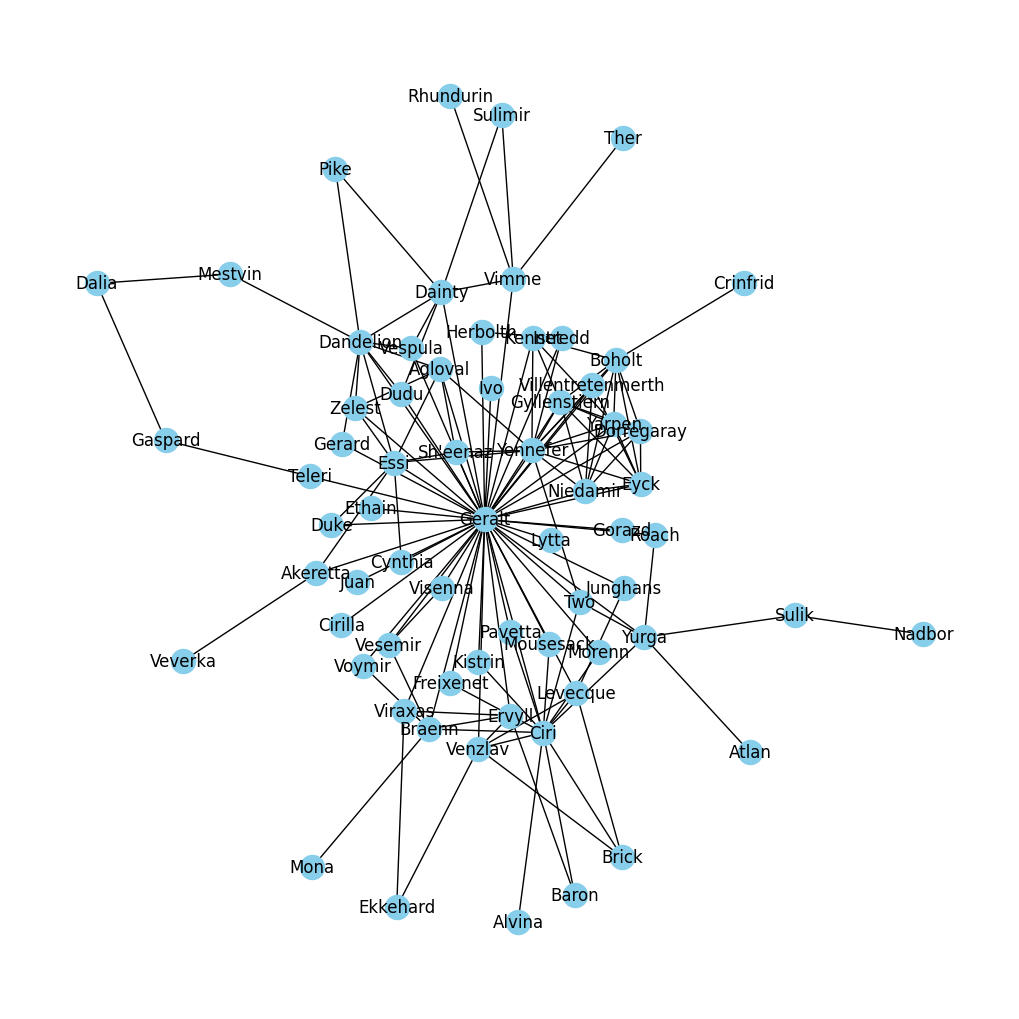

In [45]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

#### Graph visualization - Pyvis

In [46]:
from pyvis.network import Network # for network graph visualization
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

# node size: to see the main character
# degree of node = number of connections this node has
node_degree = dict(G.degree) 

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("witcher.html")

witcher.html


In [57]:
sorted(node_degree.items(), key=lambda x: x[1], reverse=True)

[('Geralt', 49),
 ('Yennefer', 14),
 ('Ciri', 14),
 ('Dandelion', 10),
 ('Boholt', 9),
 ('Essi', 9),
 ('Niedamir', 8),
 ('Eyck', 8),
 ('Gyllenstiern', 8),
 ('Yarpen', 7),
 ('Dainty', 7),
 ('Dorregaray', 6),
 ('Agloval', 6),
 ('Braenn', 6),
 ('Venzlav', 6),
 ('Yurga', 6),
 ('Kennet', 5),
 ('Vimme', 5),
 ('Ervyll', 5),
 ('Levecque', 5),
 ('Villentretenmerth', 4),
 ('Two', 4),
 ("Sh'eenaz", 4),
 ('Zelest', 4),
 ('Istredd', 3),
 ('Vespula', 3),
 ('Dudu', 3),
 ('Akeretta', 3),
 ('Vesemir', 3),
 ('Viraxas', 3),
 ('Brick', 3),
 ('Herbolth', 2),
 ('Pike', 2),
 ('Sulimir', 2),
 ('Gaspard', 2),
 ('Teleri', 2),
 ('Dalia', 2),
 ('Mestvin', 2),
 ('Gerard', 2),
 ('Duke', 2),
 ('Cynthia', 2),
 ('Voymir', 2),
 ('Kistrin', 2),
 ('Freixenet', 2),
 ('Ekkehard', 2),
 ('Morenn', 2),
 ('Pavetta', 2),
 ('Baron', 2),
 ('Junghans', 2),
 ('Mousesack', 2),
 ('Visenna', 2),
 ('Roach', 2),
 ('Sulik', 2),
 ('Crinfrid', 1),
 ('Ivo', 1),
 ('Ther', 1),
 ('Rhundurin', 1),
 ('Veverka', 1),
 ('Ethain', 1),
 ('Juan', 1),


### The most important characters in The Witcher

In [65]:
# total number of characters
len(node_degree)

67

In [60]:
# Degree centrality
# node_degree/total_number_character
degree_dict = nx.degree_centrality(G)#scale:0-1
degree_dict

{'Geralt': 0.7424242424242424,
 'Niedamir': 0.12121212121212122,
 'Eyck': 0.12121212121212122,
 'Dorregaray': 0.09090909090909091,
 'Yennefer': 0.21212121212121213,
 'Yarpen': 0.10606060606060606,
 'Gyllenstiern': 0.12121212121212122,
 'Boholt': 0.13636363636363635,
 'Kennet': 0.07575757575757576,
 'Crinfrid': 0.015151515151515152,
 'Villentretenmerth': 0.06060606060606061,
 'Istredd': 0.045454545454545456,
 'Herbolth': 0.030303030303030304,
 'Ivo': 0.015151515151515152,
 'Two': 0.06060606060606061,
 'Dandelion': 0.15151515151515152,
 'Pike': 0.030303030303030304,
 'Dainty': 0.10606060606060606,
 'Vespula': 0.045454545454545456,
 'Vimme': 0.07575757575757576,
 'Sulimir': 0.030303030303030304,
 'Ther': 0.015151515151515152,
 'Rhundurin': 0.015151515151515152,
 'Dudu': 0.045454545454545456,
 "Sh'eenaz": 0.06060606060606061,
 'Agloval': 0.09090909090909091,
 'Gaspard': 0.030303030303030304,
 'Teleri': 0.030303030303030304,
 'Dalia': 0.030303030303030304,
 'Mestvin': 0.030303030303030304,


In [61]:
# Geralt has contacted with 74% of all characters in book
sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)

[('Geralt', 0.7424242424242424),
 ('Yennefer', 0.21212121212121213),
 ('Ciri', 0.21212121212121213),
 ('Dandelion', 0.15151515151515152),
 ('Boholt', 0.13636363636363635),
 ('Essi', 0.13636363636363635),
 ('Niedamir', 0.12121212121212122),
 ('Eyck', 0.12121212121212122),
 ('Gyllenstiern', 0.12121212121212122),
 ('Yarpen', 0.10606060606060606),
 ('Dainty', 0.10606060606060606),
 ('Dorregaray', 0.09090909090909091),
 ('Agloval', 0.09090909090909091),
 ('Braenn', 0.09090909090909091),
 ('Venzlav', 0.09090909090909091),
 ('Yurga', 0.09090909090909091),
 ('Kennet', 0.07575757575757576),
 ('Vimme', 0.07575757575757576),
 ('Ervyll', 0.07575757575757576),
 ('Levecque', 0.07575757575757576),
 ('Villentretenmerth', 0.06060606060606061),
 ('Two', 0.06060606060606061),
 ("Sh'eenaz", 0.06060606060606061),
 ('Zelest', 0.06060606060606061),
 ('Istredd', 0.045454545454545456),
 ('Vespula', 0.045454545454545456),
 ('Dudu', 0.045454545454545456),
 ('Akeretta', 0.045454545454545456),
 ('Vesemir', 0.04545

In [63]:
sum(degree_dict.values())

4.363636363636363

In [68]:
pd.DataFrame({'Geralt': [1,2], 'Niedamir':[1,3]})

Geralt  Niedamir
0       1         1
1       2         3

In [66]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
degree_df.head()

centrality
Geralt        0.742424
Niedamir      0.121212
Eyck          0.121212
Dorregaray    0.090909
Yennefer      0.212121

<AxesSubplot:>

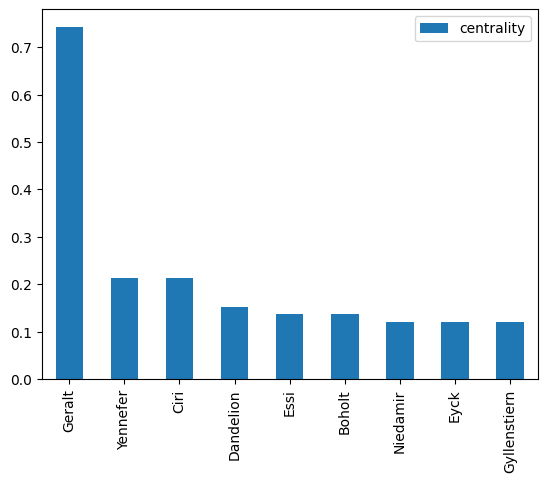

In [70]:
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

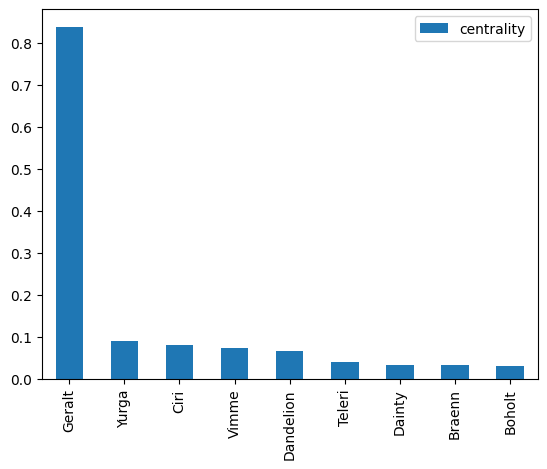

In [71]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

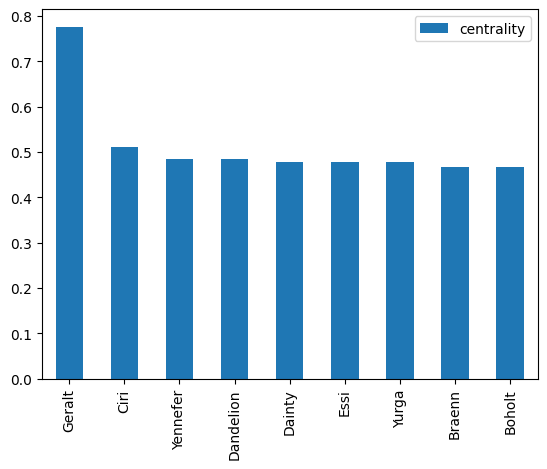

In [72]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [73]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

### Community detection

https://neo4j.com/developer/graph-data-science/community-detection-graph-algorithms/

In [76]:
import community as community_louvain

In [77]:
communities = community_louvain.best_partition(G)

In [78]:
# node and which community it belongs to
communities

{'Geralt': 2,
 'Niedamir': 1,
 'Eyck': 1,
 'Dorregaray': 1,
 'Yennefer': 1,
 'Yarpen': 1,
 'Gyllenstiern': 1,
 'Boholt': 1,
 'Kennet': 1,
 'Crinfrid': 1,
 'Villentretenmerth': 1,
 'Istredd': 2,
 'Herbolth': 2,
 'Ivo': 2,
 'Two': 2,
 'Dandelion': 4,
 'Pike': 4,
 'Dainty': 4,
 'Vespula': 4,
 'Vimme': 4,
 'Sulimir': 4,
 'Ther': 4,
 'Rhundurin': 4,
 'Dudu': 4,
 "Sh'eenaz": 0,
 'Agloval': 0,
 'Gaspard': 6,
 'Teleri': 6,
 'Dalia': 6,
 'Mestvin': 6,
 'Essi': 0,
 'Gerard': 4,
 'Zelest': 0,
 'Duke': 0,
 'Akeretta': 0,
 'Veverka': 0,
 'Ethain': 2,
 'Juan': 2,
 'Cynthia': 0,
 'Braenn': 2,
 'Ciri': 2,
 'Ervyll': 3,
 'Voymir': 2,
 'Kistrin': 2,
 'Alvina': 2,
 'Vesemir': 2,
 'Cirilla': 2,
 'Freixenet': 2,
 'Venzlav': 3,
 'Ekkehard': 3,
 'Viraxas': 3,
 'Morenn': 2,
 'Mona': 2,
 'Pavetta': 2,
 'Baron': 3,
 'Junghans': 3,
 'Brick': 3,
 'Levecque': 3,
 'Mousesack': 2,
 'Yurga': 5,
 'Visenna': 2,
 'Atlan': 5,
 'Lytta': 2,
 'Gorazd': 2,
 'Roach': 5,
 'Nadbor': 5,
 'Sulik': 5}

In [79]:
nx.set_node_attributes(G, communities, 'group')

In [80]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("witcher_communities.html")

witcher_communities.html


### Evolution of characters' importance

In [5]:
from lib.utils.functions import *

In [6]:
all_books = [b for b in os.scandir('data') if '.txt' in b.name]
# Load spacy English languague model
nlp = spacy.load("en_core_web_sm")

# Sort dir entries by name
all_books.sort(key=lambda x: x.name)

In [7]:
# Initialize empty list for graphs from books
books_graph = []
# Loop through book list and create graphs
for book in all_books:
    book_text = ner(book)
    
    # Get list of entities per sentences
    sent_entity_df = get_ne_list_per_sentence(book_text)
    
    # Select only character entities
    sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

    # Filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
    
    # Take only first name of characters
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

    # Create relationship df
    relationship_df = create_relationships(df = sent_entity_df_filtered, window_size = 5)                                                                                                               
    
    # Create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(relationship_df, 
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())     
    
    books_graph.append(G) 

/var/folders/2t/5c_z4g5j7z77jprgswwd1htr0000gn/T/ipykernel_74833/4223697425.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
/var/folders/2t/5c_z4g5j7z77jprgswwd1htr0000gn/T/ipykernel_74833/4223697425.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


<AxesSubplot:>

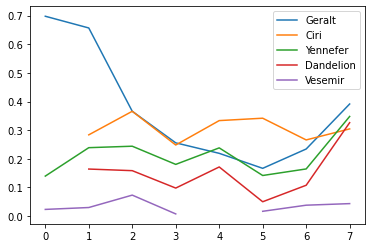

In [8]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of 5 main characters
degree_evol_df[["Geralt", "Ciri", "Yennefer", "Dandelion", "Vesemir"]].plot()